In [76]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

In [78]:
df = spark.read.csv("C:/Users/intur/Desktop/INDRAKIRAN/MRU/4-1/BDA/MIDMARKS-Spark.csv", header=True)
df.show()
df.printSchema()

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  A|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15|
|  19|  ALPHA| 14|  12| 16|  16| 20|  14|
|  20|  ALPHA| 19|  17| 20|  20| 20|  18|
+----+-------+---+----+---+----+--

#### HANDLING NULL VALUES

In [79]:
subject_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]

In [81]:
from pyspark.sql.functions import col, when
for subject in subject_columns:
    df = df.withColumn(
        subject,
        when(col(subject).isin(["A", "AB", "MP"]) | col(subject).isNull(), 0)
        .otherwise(col(subject).cast("int"))
    )


In [83]:
df.printSchema()
df.show()

root
 |-- S.NO: string (nullable = true)
 |-- SECTION: string (nullable = true)
 |-- DV: integer (nullable = true)
 |-- M-II: integer (nullable = true)
 |-- PP: integer (nullable = true)
 |-- BEEE: integer (nullable = true)
 |-- FL: integer (nullable = true)
 |-- FIMS: integer (nullable = true)

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11

In [84]:
df.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   90|
|   NULL|   27|
|   BETA|   90|
|  OMEGA|   90|
|EPSILON|   88|
|  SIGMA|   63|
|  ALPHA|   90|
|  GAMMA|   90|
|  DELTA|   90|
+-------+-----+



In [85]:
df= df.na.fill({"SECTION": "ZETA"})

In [86]:
df.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|  117|
|   BETA|   90|
|  OMEGA|   90|
|EPSILON|   88|
|  SIGMA|   63|
|  ALPHA|   90|
|  GAMMA|   90|
|  DELTA|   90|
+-------+-----+



In [87]:
from pyspark.sql.functions import when, col
df = df.withColumn(
"SECTION",
when(col("SECTION") == "GAMA", "GAMMA")
.when(col("SECTION") == "SGMA", "SIGMA")
.otherwise(col("SECTION"))
)

In [88]:
df.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   60|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   60|
|  ALPHA|   60|
|  GAMMA|   60|
|  DELTA|   60|
+-------+-----+



In [89]:
df.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
| 12|   41|
|  1|    3|
| 13|   30|
| 16|   74|
|  6|   12|
|  3|    1|
| 20|  103|
|  5|   11|
| 19|   60|
| 15|   63|
| 17|   79|
|  9|   20|
|  4|    4|
|  8|   11|
|  7|    8|
| 10|   26|
| 11|   43|
| 14|   41|
|  2|    6|
|  0|   13|
+---+-----+
only showing top 20 rows



In [90]:
df = df.na.fill({"DV": "0"})

In [91]:
df.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
| 12|   41|
|  1|    3|
| 13|   30|
| 16|   74|
|  6|   12|
|  3|    1|
| 20|  103|
|  5|   11|
| 19|   60|
| 15|   63|
| 17|   79|
|  9|   20|
|  4|    4|
|  8|   11|
|  7|    8|
| 10|   26|
| 11|   43|
| 14|   41|
|  2|    6|
|  0|   13|
+---+-----+
only showing top 20 rows



In [92]:
df.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   31|
|   1|   37|
|  13|   26|
|  16|   22|
|   6|   31|
|   3|   51|
|  20|   69|
|   5|   29|
|  19|   28|
|  15|   35|
|   9|   25|
|  17|   42|
|   4|   30|
|   8|   41|
|   7|   22|
|  10|   29|
|  11|   33|
|  14|   25|
|   2|   19|
|   0|   64|
+----+-----+
only showing top 20 rows



In [93]:
df = df.na.fill({"M-II": 0})

In [94]:
df.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   31|
|   1|   37|
|  13|   26|
|  16|   22|
|   6|   31|
|   3|   51|
|  20|   69|
|   5|   29|
|  19|   28|
|  15|   35|
|   9|   25|
|  17|   42|
|   4|   30|
|   8|   41|
|   7|   22|
|  10|   29|
|  11|   33|
|  14|   25|
|   2|   19|
|   0|   64|
+----+-----+
only showing top 20 rows



In [95]:
df.groupBy("PP").count().show()

+---+-----+
| PP|count|
+---+-----+
| 12|   41|
|  1|    9|
| 13|   20|
| 16|   36|
|  6|   25|
|  3|   16|
| 20|  106|
|  5|   27|
| 19|   50|
| 15|   44|
| 17|   47|
|  9|   38|
|  4|   13|
|  8|   24|
|  7|   24|
| 10|   26|
| 11|   46|
| 14|   44|
|  2|   17|
|  0|   22|
+---+-----+
only showing top 20 rows



In [96]:
df.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   31|
|   1|    4|
|  13|   28|
|  16|   48|
|   6|   22|
|   3|   20|
|  20|  103|
|   5|   13|
|  19|   60|
|  15|   41|
|   9|   33|
|  17|   67|
|   4|   18|
|   8|   25|
|   7|   20|
|  10|   26|
|  11|   38|
|  14|   28|
|   2|   13|
|   0|   25|
+----+-----+
only showing top 20 rows



In [97]:
df = df.na.fill({"BEEE": 0})

In [98]:
df.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   31|
|   1|    4|
|  13|   28|
|  16|   48|
|   6|   22|
|   3|   20|
|  20|  103|
|   5|   13|
|  19|   60|
|  15|   41|
|   9|   33|
|  17|   67|
|   4|   18|
|   8|   25|
|   7|   20|
|  10|   26|
|  11|   38|
|  14|   28|
|   2|   13|
|   0|   25|
+----+-----+
only showing top 20 rows



In [99]:
df.groupBy("FL").count().show()

+---+-----+
| FL|count|
+---+-----+
| 12|   13|
|  1|    3|
| 13|   71|
| 16|   21|
|  6|    4|
|  3|    1|
| 20|  189|
| 19|   53|
| 15|  113|
| 17|   17|
|  9|    4|
|  4|    3|
|  8|    9|
|  7|    3|
| 10|   77|
| 11|   13|
| 14|   17|
|  2|    1|
|  0|   16|
| 18|   90|
+---+-----+



In [100]:
df = data.na.fill({"FL": 0})

In [101]:
df.groupBy("FL").count().show()

+---+-----+
| FL|count|
+---+-----+
| 12|    7|
| 13|   50|
| 16|   15|
|  6|    2|
| 20|  120|
| 19|   34|
| 15|   85|
| 17|    9|
|  9|    3|
|  8|    6|
|  7|    2|
| 10|   55|
| 11|   10|
| 14|   11|
|  0|   13|
| 18|   58|
+---+-----+



In [102]:
df.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
|   0|   19|
+----+-----+
only showing top 20 rows



In [103]:
df = data.na.fill({"FIMS": 0})

In [104]:
df.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
|   0|   19|
+----+-----+
only showing top 20 rows



#### CALCULATIONS

In [105]:
# TOTAL CALCULATION
from pyspark.sql.functions import col
df = df.withColumn(
    "TOTAL",
    col("DV") + col("M-II") + col("PP") + col("BEEE") + col("FL") + col("FIMS")
)
data.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

In [106]:
df.groupBy("TOTAL").count().show()

+-----+-----+
|TOTAL|count|
+-----+-----+
|   31|    3|
|   85|    7|
|   65|    5|
|   53|    2|
|   78|    9|
|  108|    5|
|   34|    2|
|  115|    4|
|  101|    6|
|   81|   13|
|   28|    2|
|   76|    5|
|   26|    4|
|   44|    3|
|  103|   12|
|   91|    8|
|   93|    4|
|  111|    9|
|   47|    2|
|   52|    4|
+-----+-----+
only showing top 20 rows



In [108]:
# PERCENTAGE CALCULATION
df = df.withColumn(
    "percentage",
    (col("total") / 120) * 100
)

from pyspark.sql.functions import round
df = data.withColumn("percentage", round(col("percentage"), 2))

df.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

In [109]:
df.groupBy("percentage").count().show()

+----------+-----+
|percentage|count|
+----------+-----+
|      47.5|    2|
|      70.0|   12|
|       0.0|    7|
|     49.17|    4|
|      3.33|    1|
|     76.67|   10|
|     28.33|    2|
|     98.33|    3|
|     73.33|    5|
|      97.5|    7|
|      67.5|   13|
|      52.5|   10|
|     25.83|    3|
|      82.5|    4|
|     83.33|    6|
|      75.0|    6|
|      92.5|    9|
|     70.83|    7|
|     23.33|    2|
|      35.0|    3|
+----------+-----+
only showing top 20 rows



In [110]:
# GRADE CALCULATION
df = df.withColumn(
    "grade",
    when(col("percentage") >= 90, "A+")
    .when(col("percentage") >= 80, "A")
    .when(col("percentage") >= 70, "B")
    .when(col("percentage") >= 60, "C")
    .when(col("percentage") >= 50, "D")
    .otherwise("F")
)
df.select("total", "percentage", "grade").show()

+-----+----------+-----+
|total|percentage|grade|
+-----+----------+-----+
|   72|      60.0|    C|
|   84|      70.0|    B|
|  102|      85.0|    A|
|   94|     78.33|    B|
|  111|      92.5|   A+|
|   85|     70.83|    B|
|   94|     78.33|    B|
|  105|      87.5|    A|
|   82|     68.33|    C|
|  112|     93.33|   A+|
|  111|      92.5|   A+|
|  115|     95.83|   A+|
|   94|     78.33|    B|
|   87|      72.5|    B|
|  109|     90.83|   A+|
|   92|     76.67|    B|
|   97|     80.83|    A|
|   86|     71.67|    B|
|   92|     76.67|    B|
|  114|      95.0|   A+|
+-----+----------+-----+
only showing top 20 rows



In [111]:
df.groupBy("grade").count().show()

+-----+-----+
|grade|count|
+-----+-----+
|    F|   97|
|    B|   96|
|    D|   71|
|    C|   78|
|    A|   76|
|   A+|   62|
+-----+-----+



#### SKILLS CHECK

In [112]:
#PROGRAMMING SKILLS
df = df.withColumn(
    "Programming skills",
    when(col("PP") >= 18, "Excellent")
    .when(col("PP") >= 15, "Good")
    .otherwise("Poor")
)

df.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

In [114]:
#DA SKILLS
df = df.withColumn(
    "DA SKILLS",
    when(col("DV") >= 18, "Excellent")
    .when(col("DV") >= 15, "Good")
    .otherwise("Poor")
)
df.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

#### VISUAL REPRESENTATION

In [39]:
pip install pandas --upgrade


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\intur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [115]:
pandas_df=df.toPandas()

In [116]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                480 non-null    object 
 1   SECTION             480 non-null    object 
 2   DV                  480 non-null    int32  
 3   M-II                480 non-null    int32  
 4   PP                  480 non-null    int32  
 5   BEEE                480 non-null    int32  
 6   FL                  480 non-null    int32  
 7   FIMS                480 non-null    int32  
 8   TOTAL               480 non-null    int32  
 9   percentage          480 non-null    float64
 10  grade               480 non-null    object 
 11  Programming skills  480 non-null    object 
 12  DA SKILLS           480 non-null    object 
dtypes: float64(1), int32(7), object(5)
memory usage: 35.8+ KB


In [117]:
df=pandas_df

In [118]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\intur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [119]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\intur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [120]:
import warnings
warnings.filterwarnings('ignore')

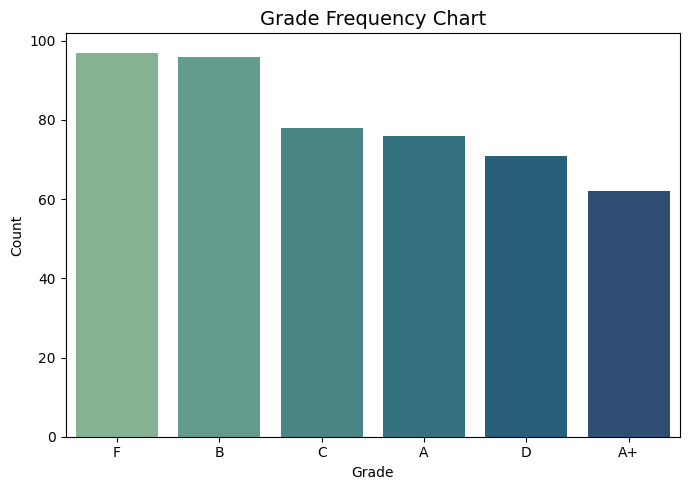

In [134]:
import matplotlib.pyplot as plt
import seaborn as sbn
fig, ax = plt.subplots(figsize=(7,5))
sbn.barplot(
    x=df['grade'].value_counts().index, 
    y=df['grade'].value_counts().values, 
    palette="crest", 
    ax=ax
)
ax.set_title("Grade Frequency Chart", fontsize=14)
ax.set_xlabel("Grade")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


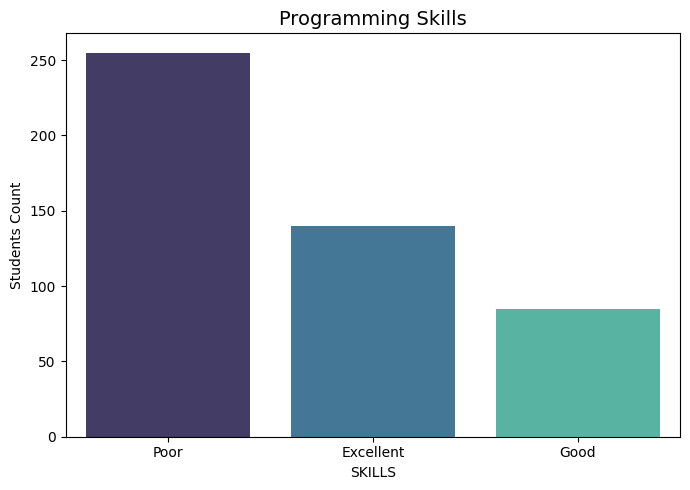

In [135]:
import matplotlib.pyplot as plt
import seaborn as sbn

# Plot distribution of programming skill levels (Column: Programming skills)
fig, ax = plt.subplots(figsize=(7,5))
skill_counts = df['Programming skills'].value_counts()

sbn.barplot(
    x=skill_counts.index,
    y=skill_counts.values,
    palette="mako",
    ax=ax
)

ax.set_title("Programming Skills", fontsize=14)
ax.set_xlabel("SKILLS")
ax.set_ylabel("Students Count")
plt.setp(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


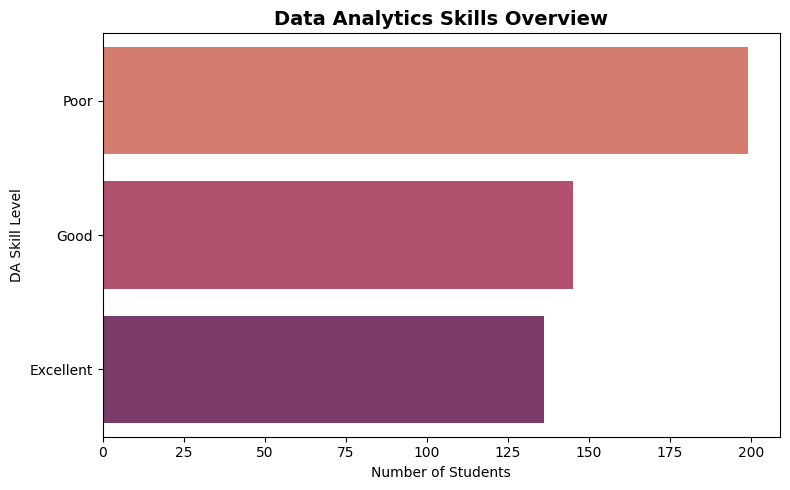

In [136]:
import matplotlib.pyplot as plt
import seaborn as sbn

# Visualizing Data Analytics skill levels (Column: DA SKILLS)
fig, ax = plt.subplots(figsize=(8,5))

da_counts = df['DA SKILLS'].value_counts()

sbn.barplot(
    y=da_counts.index,
    x=da_counts.values,
    palette="flare",
    ax=ax
)

ax.set_title("Data Analytics Skills Overview", fontsize=14, fontweight="bold")
ax.set_xlabel("Number of Students")
ax.set_ylabel("DA Skill Level")

plt.tight_layout()
plt.show()


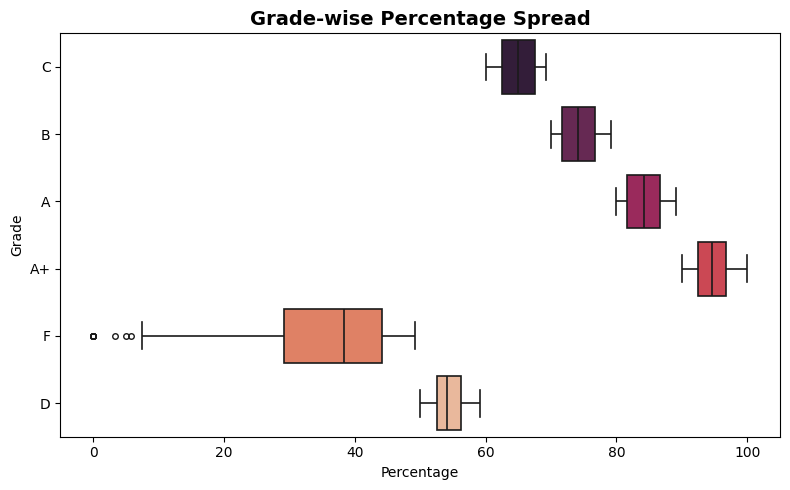

In [137]:
import matplotlib.pyplot as plt
import seaborn as sbn

# Boxplot of percentage scores across grade categories
fig, ax = plt.subplots(figsize=(8,5))

sbn.boxplot(
    y='grade',
    x='percentage',
    data=df,
    palette="rocket",
    ax=ax,
    fliersize=4,   
    linewidth=1.2 
)

ax.set_title("Grade-wise Percentage Spread", fontsize=14, fontweight="bold")
ax.set_xlabel("Percentage")
ax.set_ylabel("Grade")

plt.tight_layout()
plt.show()


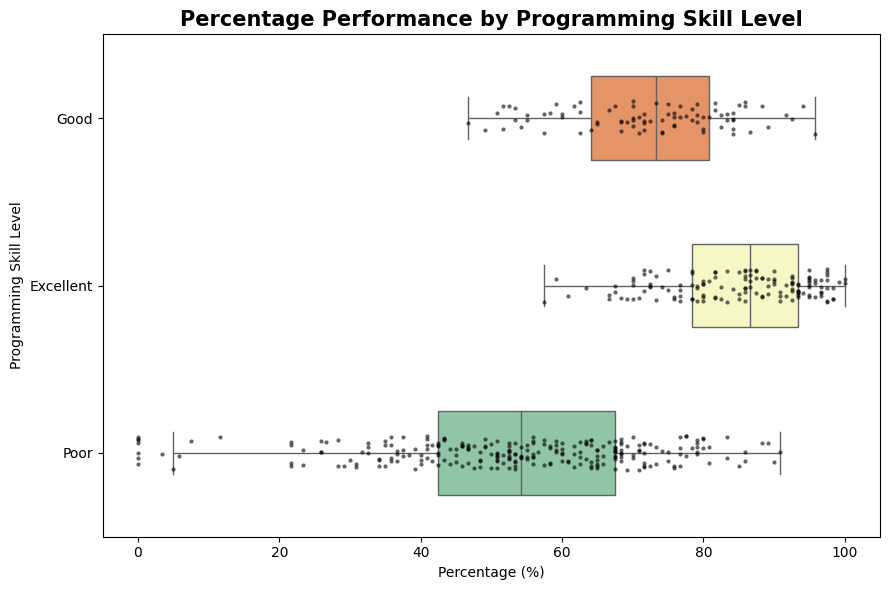

In [138]:
import matplotlib.pyplot as plt
import seaborn as sbn
# Comparing programming skill levels with percentage scores
fig, ax = plt.subplots(figsize=(9,6))

# Base boxplot
sbn.boxplot(
    y='Programming skills',
    x='percentage',
    data=df,
    palette="Spectral",
    ax=ax,
    width=0.5,
    fliersize=0   
)
sbn.stripplot(
    y='Programming skills',
    x='percentage',
    data=df,
    color="black",
    size=3,
    alpha=0.6,
    ax=ax
)

ax.set_title("Percentage Performance by Programming Skill Level", fontsize=15, fontweight="bold")
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Programming Skill Level")

plt.tight_layout()
plt.show()


In [139]:
import pandas as pd

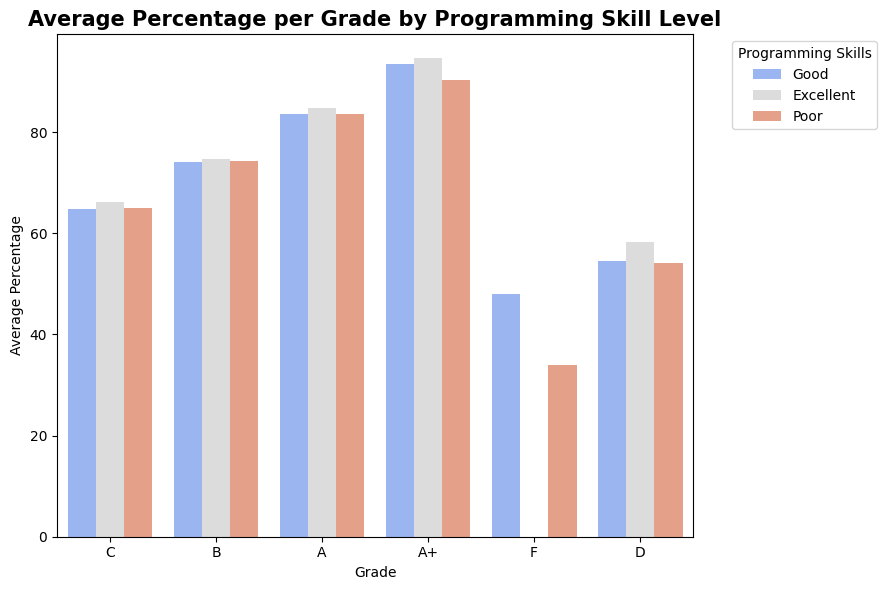

In [148]:
import matplotlib.pyplot as plt
import seaborn as sbn
# Relationship between Grade and Programming Skills
fig, ax = plt.subplots(figsize=(9,6))

sbn.barplot(
    data=df,
    x='grade',
    y='percentage',
    hue='Programming skills',
    palette="coolwarm",
    ci=None,
    ax=ax
)

ax.set_title("Average Percentage per Grade by Programming Skill Level", fontsize=15, fontweight="bold")
ax.set_xlabel("Grade")
ax.set_ylabel("Average Percentage")
ax.legend(title="Programming Skills", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


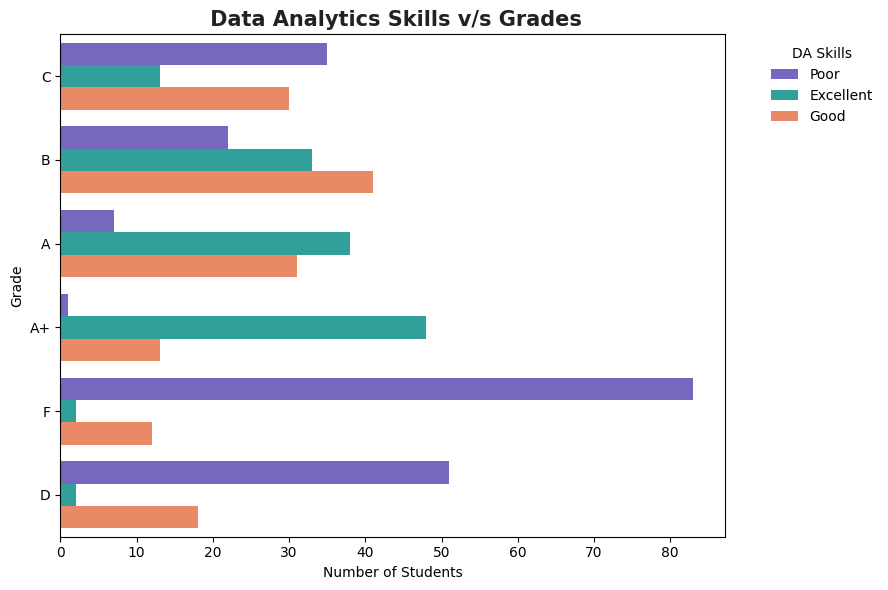

In [146]:
import matplotlib.pyplot as plt
import seaborn as sbn

custom_colors = ["#6A5ACD", "#20B2AA", "#FF7F50", "#FFD700", "#8B0000"]

fig, ax = plt.subplots(figsize=(9,6))

sbn.countplot(
    data=df,
    y='grade',
    hue='DA SKILLS',
    palette=custom_colors,
    ax=ax
)

ax.set_title(" Data Analytics Skills v/s Grades", fontsize=15, fontweight="bold", color="#222222")
ax.set_xlabel("Number of Students")
ax.set_ylabel("Grade")

# Legend styling
ax.legend(title="DA Skills", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


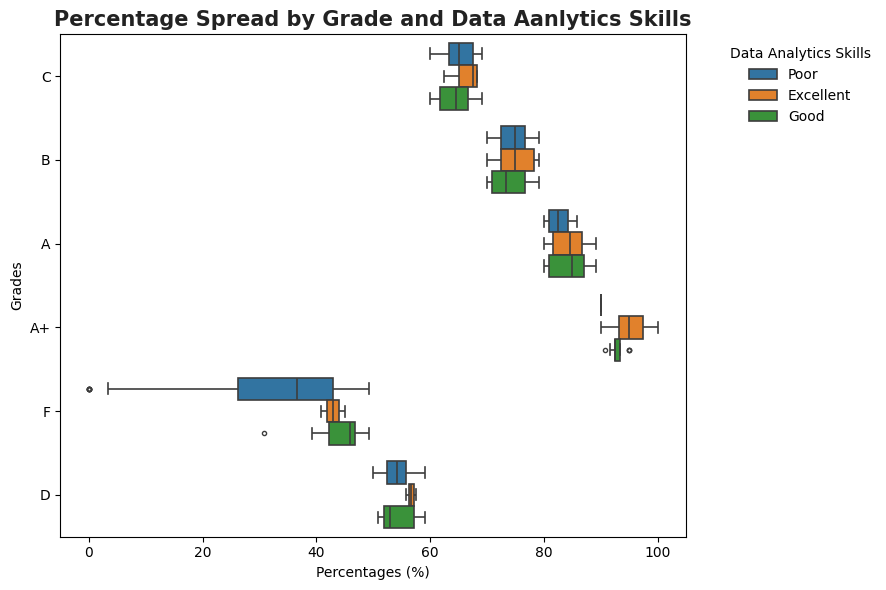

In [147]:
import matplotlib.pyplot as plt
import seaborn as sbn

custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"]

fig, ax = plt.subplots(figsize=(9,6))

sbn.boxplot(
    data=df,
    y='grade',
    x='percentage',
    hue='DA SKILLS',
    palette=custom_colors,
    ax=ax,
    fliersize=3,    
    linewidth=1.2   
)

ax.set_title("Percentage Spread by Grade and Data Aanlytics Skills", fontsize=15, fontweight="bold", color="#222222")
ax.set_xlabel("Percentages (%)")
ax.set_ylabel("Grades")

ax.legend(title="Data Analytics Skills", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


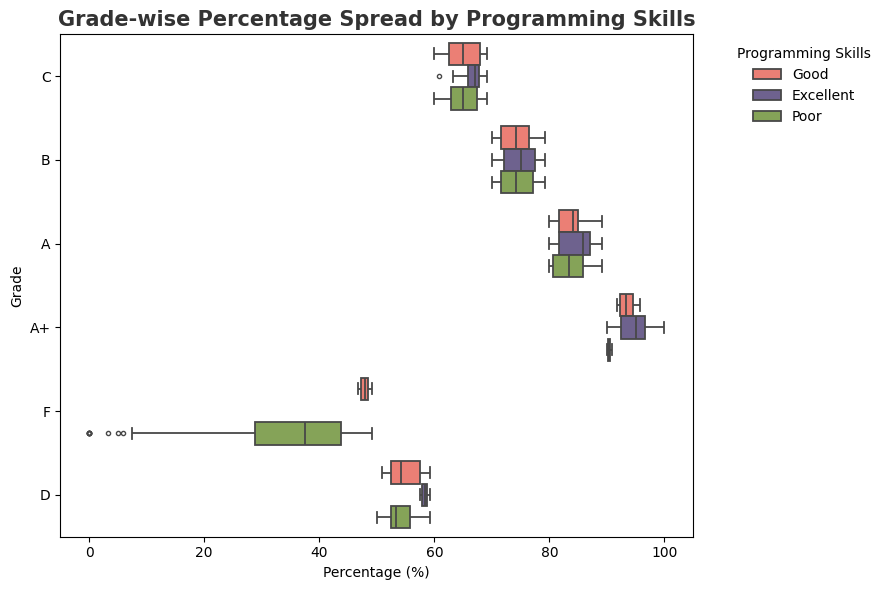

In [143]:
import matplotlib.pyplot as plt
import seaborn as sbn
custom_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA500", "#009688"]
fig, ax = plt.subplots(figsize=(9,6))
sbn.boxplot(
    data=df,
    y='grade',
    x='percentage',
    hue='Programming skills',
    palette=custom_colors,
    ax=ax,
    fliersize=3,  
    linewidth=1.3  
)

ax.set_title("Grade-wise Percentage Spread by Programming Skills", fontsize=15, fontweight="bold", color="#333333")
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Grade")

ax.legend(title="Programming Skills", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


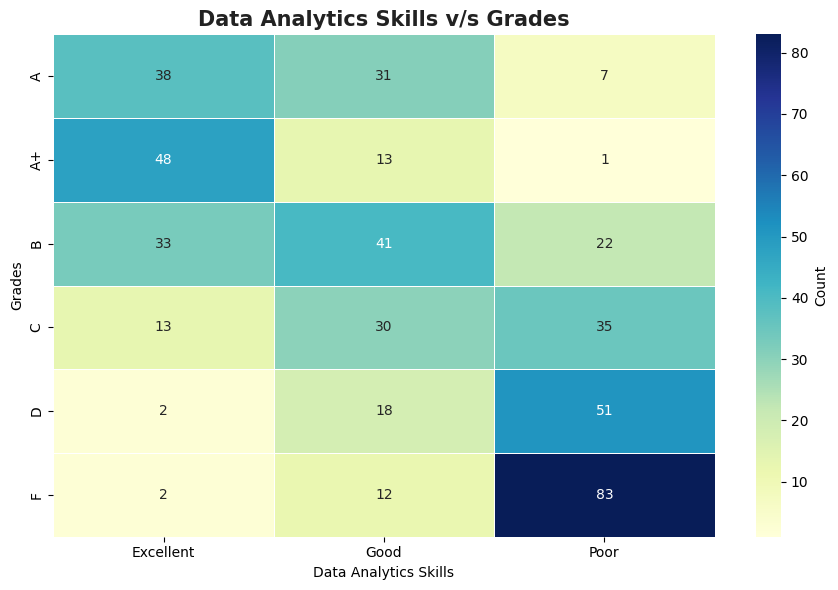

In [144]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
cross_da = pd.crosstab(df['grade'], df['DA SKILLS'])
fig, ax = plt.subplots(figsize=(9,6))

sbn.heatmap(
    cross_da,
    annot=True,
    cmap="YlGnBu",   
    fmt="d",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Count"}
)
ax.set_title("Data Analytics Skills v/s Grades", fontsize=15, fontweight="bold", color="#222222")
ax.set_xlabel("Data Analytics Skills")
ax.set_ylabel("Grades")

plt.tight_layout()
plt.show()
